In [1]:
import pandas as pd
pd.options.display.max_columns = 100
import json, itertools
import time
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

# Counting number of words per person per session

Importing a json file containing a map between active PersonNumber's and PersonIdCode's

In [2]:
with open('data/active_PersonNumber_PersonIdCode_map.json') as data_file:
    person_map = json.load(data_file)
    
active_ids = list(person_map.values())
active_ids.sort()
active_numbers = list(person_map.keys())
active_numbers.sort()

Importing info about the parliament members

In [3]:
mmbr = pd.read_csv('data/MemberCouncil.csv')
# the ppl DataFrame will be useful to map PersonNumber to PersonIdCode
ppl = pd.read_csv('data/Person.csv').dropna(axis=0, subset=['PersonNumber', 'PersonIdCode'])

Importing a cleaned version of the transcripts containing no NaN on either PersonNumber or Text

In [4]:
transc = pd.read_csv('data/transcript_clean.csv').drop('Unnamed: 0', axis=1)

Building the DataFrame that will store our calculations

In [5]:
# columns
cols = ['PersonIdCode']
cols.extend(transc.IdSession.unique().tolist())
df = pd.DataFrame(columns=cols)
df.PersonIdCode = active_ids
df.fillna(value=0, inplace=True)
df.set_index('PersonIdCode', inplace=True)

In [ ]:
df.tail(2)

In [6]:
for row in transc.iterrows():
    row = row[1]
    #print(row['PersonNumber'])
    if str(row['PersonNumber']) in active_numbers:
        df.loc[int(str(person_map[str(row['PersonNumber'])])), row['IdSession']] += len(ut.to_text(row['Text']).split())

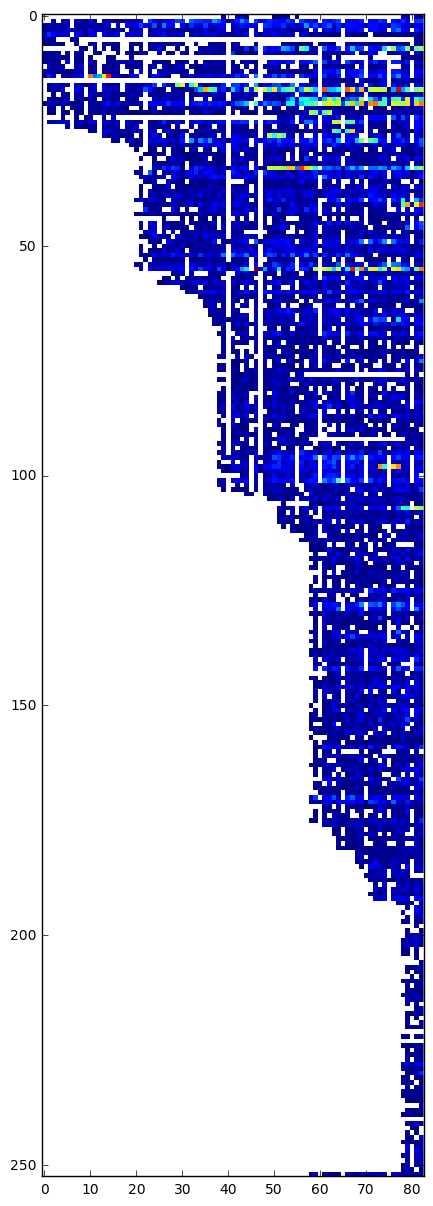

In [7]:
B = df.replace(0, np.nan).drop([49, 3, 4, 5, 59], axis=1)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(B, interpolation="none")

plt.show()